In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import pymongo
from pymongo import MongoClient
import pyarrow as pa

In [2]:
mongo_client=MongoClient()
mongo_db=mongo_client["StockMarket"]


In [3]:
stockes_master_data=mongo_db.stockes_master_tbl.find()
stockes_master_df=pd.DataFrame(list(stockes_master_data))
stockes_master_df['Date']=pd.to_datetime(stockes_master_df['Date'])

In [4]:
stockes_master_df.head()

,_id,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,6173a2f59fb247744e8d958f,ACC,EQ,2018-01-01,1758.40,1763.95,1763.95,1725.0,1731.4,1731.35,1744.88,123565,2.156061e+08,6063,42389,34.31
1,6173a2f59fb247744e8d9590,ACC,EQ,2018-01-02,1731.35,1736.20,1745.80,1725.0,1739.0,1743.20,1735.20,277110,4.808423e+08,12406,160477,57.91
2,6173a2f59fb247744e8d9591,ACC,EQ,2018-01-03,1743.20,1741.10,1780.00,1740.1,1780.0,1774.60,1761.56,194666,3.429149e+08,10000,58569,30.09
3,6173a2f59fb247744e8d9592,ACC,EQ,2018-01-04,1774.60,1779.95,1808.00,1770.0,1794.5,1801.35,1786.03,278240,4.969441e+08,11563,106122,38.14
4,6173a2f59fb247744e8d9593,ACC,EQ,2018-01-05,1801.35,1801.10,1820.40,1795.6,1814.9,1809.95,1808.23,312489,5.650512e+08,13574,152646,48.85


In [5]:
stockes_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89626 entries, 0 to 89625
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   _id                     89626 non-null  object        
 1   Symbol                  89626 non-null  object        
 2   Series                  89626 non-null  object        
 3   Date                    89626 non-null  datetime64[ns]
 4   Prev Close              89626 non-null  float64       
 5   Open Price              89626 non-null  float64       
 6   High Price              89626 non-null  float64       
 7   Low Price               89626 non-null  float64       
 8   Last Price              89626 non-null  float64       
 9   Close Price             89626 non-null  float64       
 10  Average Price           89626 non-null  float64       
 11  Total Traded Quantity   89626 non-null  int64         
 12  Turnover                89626 non-null  float6

In [6]:
indexs_master_data=mongo_db.indexs_master_tbl.find()
indexs_master_df=pd.DataFrame(list(indexs_master_data))

In [7]:
indexs_master_df.head()

,_id,Symbol,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,6173d9824baed11d386ac8a4,nifty50,01-Jan-2018,10531.70,10537.85,10423.10,10435.55,134532090,7546.56
1,6173d9824baed11d386ac8a5,nifty50,02-Jan-2018,10477.55,10495.20,10404.65,10442.20,158092430,8665.47
2,6173d9824baed11d386ac8a6,nifty50,03-Jan-2018,10482.65,10503.60,10429.55,10443.20,172516859,9541.6
3,6173d9824baed11d386ac8a7,nifty50,04-Jan-2018,10469.40,10513.00,10441.45,10504.80,180257392,9561.95
4,6173d9824baed11d386ac8a8,nifty50,05-Jan-2018,10534.25,10566.10,10520.10,10558.85,186469717,10306.2


In [8]:
indexs_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                1880 non-null   object 
 1   Symbol             1880 non-null   object 
 2   Date               1880 non-null   object 
 3   Open               1880 non-null   float64
 4   High               1880 non-null   float64
 5   Low                1880 non-null   float64
 6   Close              1880 non-null   float64
 7   Shares Traded      1880 non-null   object 
 8   Turnover (Rs. Cr)  1880 non-null   object 
dtypes: float64(4), object(5)
memory usage: 132.3+ KB


*** Converting Date column to dateTime object

In [9]:
indexs_master_df['Date']=pd.to_datetime(indexs_master_df['Date'])

In [10]:
indexs_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _id                1880 non-null   object        
 1   Symbol             1880 non-null   object        
 2   Date               1880 non-null   datetime64[ns]
 3   Open               1880 non-null   float64       
 4   High               1880 non-null   float64       
 5   Low                1880 non-null   float64       
 6   Close              1880 non-null   float64       
 7   Shares Traded      1880 non-null   object        
 8   Turnover (Rs. Cr)  1880 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 132.3+ KB


In [11]:
vix_master_data=mongo_db.vix_master_tbl.find()

vix_master_df=pd.DataFrame(list(vix_master_data))
vix_master_df['Date']=pd.to_datetime(vix_master_df['Date'])


In [12]:
vix_master_df.head()


,_id,Symbol,Date,Open,High,Low,Close,Prev. Close,Change,% Change
0,6173d9824baed11d386ac4f8,indiavix,2018-01-01,12.6700,13.6125,12.5450,13.3525,12.6700,0.68,5.39
1,6173d9824baed11d386ac4f9,indiavix,2018-01-02,13.3525,13.8425,12.6050,13.6850,13.3525,0.33,2.49
2,6173d9824baed11d386ac4fa,indiavix,2018-01-03,13.6850,13.7150,12.7650,13.6225,13.6850,-0.06,-0.46
3,6173d9824baed11d386ac4fb,indiavix,2018-01-04,13.6225,13.7925,12.1825,13.4150,13.6225,-0.21,-1.52
4,6173d9824baed11d386ac4fc,indiavix,2018-01-05,13.4150,13.4150,12.4200,13.1125,13.4150,-0.30,-2.25


In [13]:

vix_master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          940 non-null    object        
 1   Symbol       940 non-null    object        
 2   Date         940 non-null    datetime64[ns]
 3   Open         940 non-null    float64       
 4   High         940 non-null    float64       
 5   Low          940 non-null    float64       
 6   Close        940 non-null    float64       
 7   Prev. Close  940 non-null    float64       
 8   Change       940 non-null    float64       
 9   % Change     940 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 73.6+ KB


In [14]:
#list(vix_master_df.columns)

In [15]:
vix_master_df['Date']

0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
         ...    
935   2021-10-12
936   2021-10-13
937   2021-10-14
938   2021-10-18
939   2021-10-19
Name: Date, Length: 940, dtype: datetime64[ns]

In [16]:
vix_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          940 non-null    object        
 1   Symbol       940 non-null    object        
 2   Date         940 non-null    datetime64[ns]
 3   Open         940 non-null    float64       
 4   High         940 non-null    float64       
 5   Low          940 non-null    float64       
 6   Close        940 non-null    float64       
 7   Prev. Close  940 non-null    float64       
 8   Change       940 non-null    float64       
 9   % Change     940 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 73.6+ KB


In [17]:
# Have three Dataframes now .
#stockes_master_df.info()
indexs_master_df.info()
#vix_master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _id                1880 non-null   object        
 1   Symbol             1880 non-null   object        
 2   Date               1880 non-null   datetime64[ns]
 3   Open               1880 non-null   float64       
 4   High               1880 non-null   float64       
 5   Low                1880 non-null   float64       
 6   Close              1880 non-null   float64       
 7   Shares Traded      1880 non-null   object        
 8   Turnover (Rs. Cr)  1880 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 132.3+ KB


In [18]:
###################################
# if you want to add new col for month ,year,day
#stockes_master_df['Year']=stockes_master_df['Date'].dt.year
#stockes_master_df['Month']=stockes_master_df['Date'].dt.month
#stockes_master_df['Day']=stockes_master_df['Date'].dt.day
###################################
# Rearrange stocks/index dataframe for just symbol,date,ohlc,volume,deliverable qt.
stockes_master_df=stockes_master_df[['Symbol','Date','Open Price','High Price','Low Price','Close Price','Total Traded Quantity','Deliverable Qty']]
stockes_master_df=stockes_master_df.set_index('Date')
indexs_master_df=indexs_master_df[['Symbol','Date','Open','High','Low','Close','Shares Traded']]
indexs_master_df=indexs_master_df.set_index('Date')

In [19]:
stockes_master_df.head()

,Symbol,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,Deliverable Qty
Date,,,,,,,
2018-01-01,ACC,1763.95,1763.95,1725.0,1731.35,123565,42389
2018-01-02,ACC,1736.20,1745.80,1725.0,1743.20,277110,160477
2018-01-03,ACC,1741.10,1780.00,1740.1,1774.60,194666,58569
2018-01-04,ACC,1779.95,1808.00,1770.0,1801.35,278240,106122
2018-01-05,ACC,1801.10,1820.40,1795.6,1809.95,312489,152646


In [20]:

indexs_master_df.head()

,Symbol,Open,High,Low,Close,Shares Traded
Date,,,,,,
2018-01-01,nifty50,10531.70,10537.85,10423.10,10435.55,134532090
2018-01-02,nifty50,10477.55,10495.20,10404.65,10442.20,158092430
2018-01-03,nifty50,10482.65,10503.60,10429.55,10443.20,172516859
2018-01-04,nifty50,10469.40,10513.00,10441.45,10504.80,180257392
2018-01-05,nifty50,10534.25,10566.10,10520.10,10558.85,186469717


In [21]:
stockes_master_df['2018-01-01']

,Symbol,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,Deliverable Qty
Date,,,,,,,
2018-01-01,ACC,1763.95,1763.95,1725.00,1731.35,123565,42389
2018-01-01,ADANIENT,165.80,169.85,165.00,166.05,4220395,534498
2018-01-01,ADANIPORTS,406.70,407.70,398.05,399.65,2701537,1635026
2018-01-01,ADANITRANS,224.15,226.80,218.50,219.70,1005616,347027
2018-01-01,AMBUJACEM,271.10,273.10,264.35,268.05,1408955,620792
...,...,...,...,...,...,...,...
2018-01-01,ULTRACEMCO,4302.20,4319.80,4243.05,4256.05,166780,109697
2018-01-01,UPL,761.80,770.00,752.50,755.75,1068067,509657
2018-01-01,VEDL,331.00,333.30,323.40,325.45,5729566,1541384


**** This is how to filter data based on some filter .Ex displaying rows where symbol=nity50

In [22]:
indexs_master_df.loc[indexs_master_df['Symbol']=='nifty50']

,Symbol,Open,High,Low,Close,Shares Traded
Date,,,,,,
2018-01-01,nifty50,10531.70,10537.85,10423.10,10435.55,134532090
2018-01-02,nifty50,10477.55,10495.20,10404.65,10442.20,158092430
2018-01-03,nifty50,10482.65,10503.60,10429.55,10443.20,172516859
2018-01-04,nifty50,10469.40,10513.00,10441.45,10504.80,180257392
2018-01-05,nifty50,10534.25,10566.10,10520.10,10558.85,186469717
...,...,...,...,...,...,...
2021-10-12,nifty50,17915.80,18008.65,17864.95,17991.95,355568313
2021-10-13,nifty50,18097.85,18197.80,18050.75,18161.75,506679748
2021-10-14,nifty50,18272.85,18350.75,18248.70,18338.55,538714440


In [23]:
#Merged stock and index based on date index.
merged=pd.merge(stockes_master_df,indexs_master_df, on='Date')

In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179252 entries, 2018-01-01 to 2021-09-20
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Symbol_x               179252 non-null  object 
 1   Open Price             179252 non-null  float64
 2   High Price             179252 non-null  float64
 3   Low Price              179252 non-null  float64
 4   Close Price            179252 non-null  float64
 5   Total Traded Quantity  179252 non-null  int64  
 6   Deliverable Qty        179252 non-null  int64  
 7   Symbol_y               179252 non-null  object 
 8   Open                   179252 non-null  float64
 9   High                   179252 non-null  float64
 10  Low                    179252 non-null  float64
 11  Close                  179252 non-null  float64
 12  Shares Traded          179252 non-null  object 
dtypes: float64(8), int64(2), object(3)
memory usage: 19.1+ MB


In [25]:
merged.head()

,Symbol_x,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,Deliverable Qty,Symbol_y,Open,High,Low,Close,Shares Traded
Date,,,,,,,,,,,,,
2018-01-01,ACC,1763.95,1763.95,1725.00,1731.35,123565,42389,nifty50,10531.70,10537.85,10423.10,10435.55,134532090
2018-01-01,ACC,1763.95,1763.95,1725.00,1731.35,123565,42389,niftyBank,25565.75,25588.00,25271.55,25318.10,57576913
2018-01-01,ADANIENT,165.80,169.85,165.00,166.05,4220395,534498,nifty50,10531.70,10537.85,10423.10,10435.55,134532090
2018-01-01,ADANIENT,165.80,169.85,165.00,166.05,4220395,534498,niftyBank,25565.75,25588.00,25271.55,25318.10,57576913
2018-01-01,ADANIPORTS,406.70,407.70,398.05,399.65,2701537,1635026,nifty50,10531.70,10537.85,10423.10,10435.55,134532090


In [26]:
#Calculated RS
merged['rs']=(merged['Close Price']/merged['Close'])*100

In [29]:
#Multiple Filters
#rs_df=merged.loc[(merged['Symbol_x']=='ACC') & (merged['Symbol_y']=='nifty50')]
rs_df=merged.loc[(merged['Symbol_y']=='nifty50')]

In [33]:
ACC=rs_df.loc[rs_df['Symbol_x']=='ACC']
ACC

,Symbol_x,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,Deliverable Qty,Symbol_y,Open,High,Low,Close,Shares Traded,rs
Date,,,,,,,,,,,,,,
2018-01-01,ACC,1763.95,1763.95,1725.00,1731.35,123565,42389,nifty50,10531.70,10537.85,10423.10,10435.55,134532090,16.590884
2018-01-02,ACC,1736.20,1745.80,1725.00,1743.20,277110,160477,nifty50,10477.55,10495.20,10404.65,10442.20,158092430,16.693800
2018-01-03,ACC,1741.10,1780.00,1740.10,1774.60,194666,58569,nifty50,10482.65,10503.60,10429.55,10443.20,172516859,16.992876
2018-01-04,ACC,1779.95,1808.00,1770.00,1801.35,278240,106122,nifty50,10469.40,10513.00,10441.45,10504.80,180257392,17.147875
2018-01-05,ACC,1801.10,1820.40,1795.60,1809.95,312489,152646,nifty50,10534.25,10566.10,10520.10,10558.85,186469717,17.141545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-14,ACC,2470.00,2475.05,2437.55,2442.95,174874,69770,nifty50,17420.35,17438.55,17367.05,17380.00,230354386,14.056099
2021-09-15,ACC,2448.00,2479.60,2442.60,2467.40,234175,78542,nifty50,17387.65,17532.70,17386.90,17519.45,388191629,14.083775
2021-09-16,ACC,2476.60,2479.40,2416.25,2429.70,264530,78630,nifty50,17539.20,17644.60,17510.45,17629.50,503310763,13.782013


In [31]:
import matplotlib.pyplot as plt

In [36]:
ACC.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09',
               '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16',
               '2021-09-17', '2021-09-20'],
              dtype='datetime64[ns]', name='Date', length=920, freq=None)

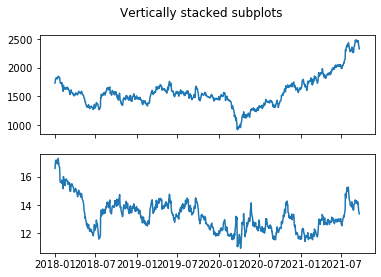

In [41]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Vertically stacked subplots')
ax1.plot(ACC.index,ACC['Close Price'])
ax2.plot(ACC.index,ACC['rs'])
#plt.plot(ACC.index,ACC['Close Price'])


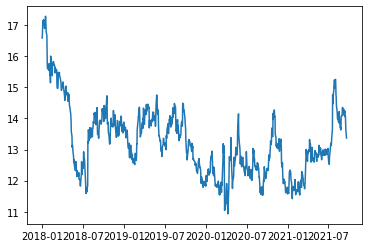

In [39]:
plt.plot(ACC.index,ACC['rs'])